In [2]:
import os, numpy as np, matplotlib.pyplot as plt, cv2 as cv

In [3]:
FILE_PATH="./dataset"
# INPUT_FILE="./dog-5357794_1280.jpg"
INPUT_FILE="./360_F_70710568_a7pD2LlcjvDaFYQSQeqvVaSsDfEw2n2T.jpg"

In [4]:
def show_image(image):
    plt.imshow(image, cmap="gray")
    plt.xticks([])
    plt.yticks([])
    plt.show()

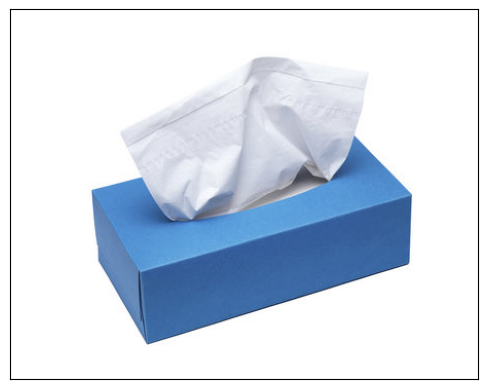

In [5]:
input_image=cv.cvtColor(cv.imread(INPUT_FILE), cv.COLOR_BGR2RGB)
show_image(input_image)

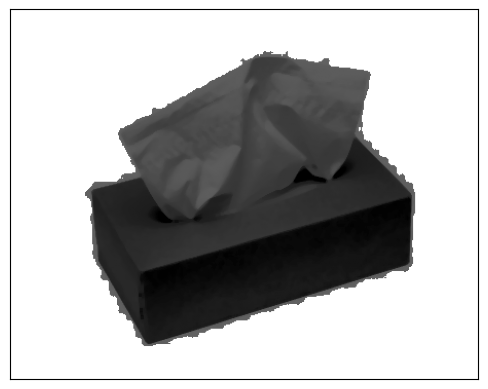

In [6]:
input_image_gray=cv.cvtColor(cv.imread(INPUT_FILE), cv.COLOR_BGR2GRAY)
input_image_gray=cv.medianBlur(input_image_gray, 5)
input_image_gray=cv.equalizeHist(input_image_gray)
show_image(input_image_gray)

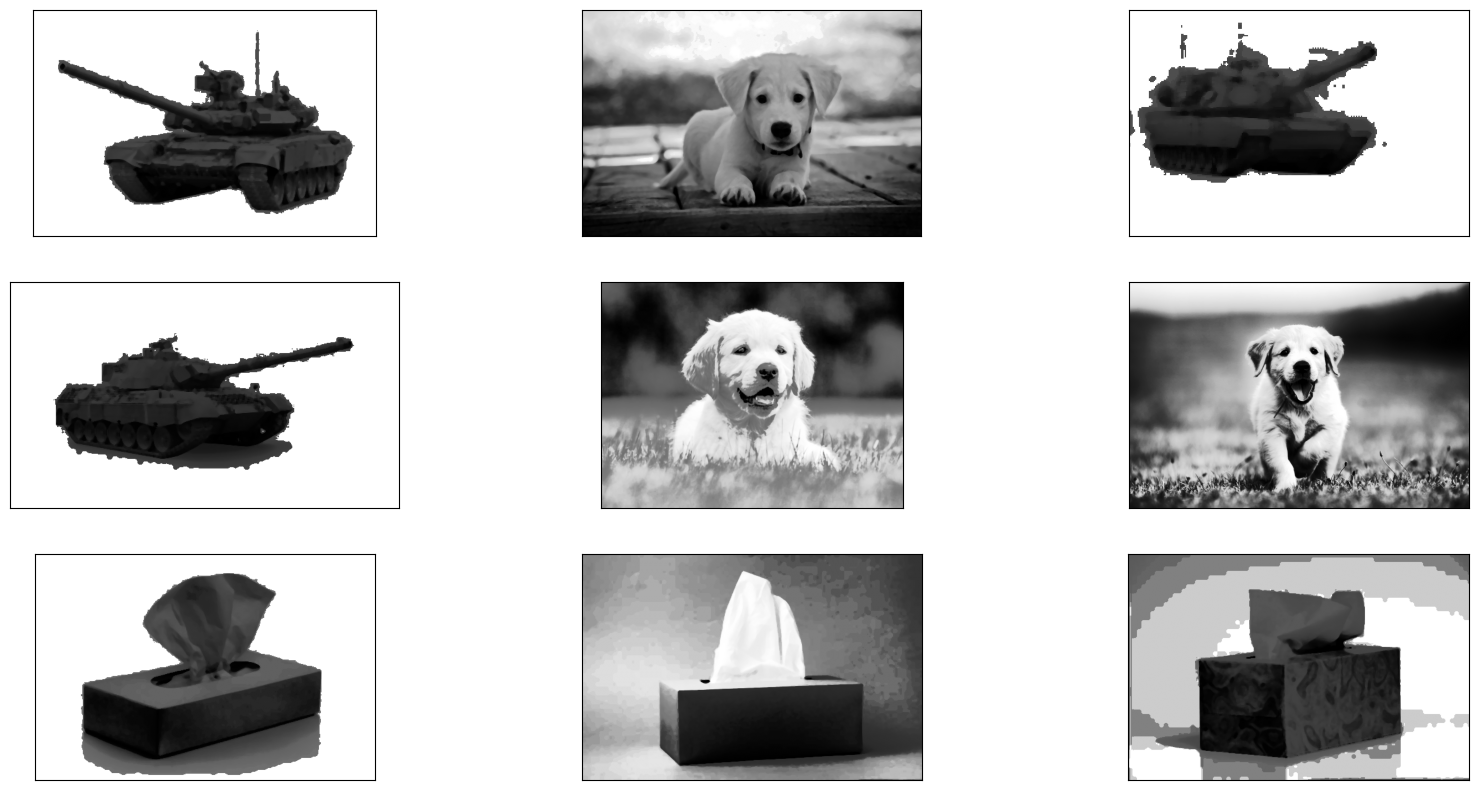

In [7]:
dataset=[]
for i in os.listdir(FILE_PATH):
    img_path=FILE_PATH + "/" + i
    img=cv.imread(img_path)
    img=cv.cvtColor(cv.imread(img_path), cv.COLOR_BGR2RGB)
    img=cv.cvtColor(img, cv.COLOR_RGB2GRAY)
    img=cv.medianBlur(img, 5)
    img=cv.equalizeHist(img)
    dataset.append(img)

plt.figure(figsize=(20, 10))
for h, i in enumerate(dataset):
    plt.subplot(3,3,h+1)
    plt.imshow(i, cmap="gray")
    plt.xticks([])
    plt.yticks([])
plt.show()

In [8]:
# sift=cv.SIFT_create()
# input_keypoint, input_descriptor=sift.detectAndCompute(input_image, None)
# input_descriptor=np.float32(input_descriptor)
orb=cv.ORB_create()
input_keypoint, input_descriptor=orb.detectAndCompute(input_image_gray, None)
input_descriptor=np.float32(input_descriptor)

In [9]:
input_keypoint

(< cv2.KeyPoint 0x7adf4dd05e00>,
 < cv2.KeyPoint 0x7adf4ddc1500>,
 < cv2.KeyPoint 0x7adf4ddc3f60>,
 < cv2.KeyPoint 0x7adf4ddc1470>,
 < cv2.KeyPoint 0x7adf4ddc3f90>,
 < cv2.KeyPoint 0x7adf4ddc1890>,
 < cv2.KeyPoint 0x7adf4ddc1830>,
 < cv2.KeyPoint 0x7adf4ddc3030>,
 < cv2.KeyPoint 0x7adf4ddc1680>,
 < cv2.KeyPoint 0x7adf4ddc2940>,
 < cv2.KeyPoint 0x7adf4ddc3f00>,
 < cv2.KeyPoint 0x7adf4ddc3fc0>,
 < cv2.KeyPoint 0x7adf4ddc2760>,
 < cv2.KeyPoint 0x7adf4ddc2700>,
 < cv2.KeyPoint 0x7adf4ddc3ea0>,
 < cv2.KeyPoint 0x7adf4ddc3e40>,
 < cv2.KeyPoint 0x7adf4ddc3db0>,
 < cv2.KeyPoint 0x7adf4ddc3d80>,
 < cv2.KeyPoint 0x7adf4ddc3e10>,
 < cv2.KeyPoint 0x7adf4ddc3de0>,
 < cv2.KeyPoint 0x7adf4ddc3e70>,
 < cv2.KeyPoint 0x7adf4ddc3d50>,
 < cv2.KeyPoint 0x7adf4ddc3cf0>,
 < cv2.KeyPoint 0x7adf4ddc3c60>,
 < cv2.KeyPoint 0x7adf4ddc3cc0>,
 < cv2.KeyPoint 0x7adf4ddc3c90>,
 < cv2.KeyPoint 0x7adf4ddc3d20>,
 < cv2.KeyPoint 0x7adf4ddc3c30>,
 < cv2.KeyPoint 0x7adf4ddc3c00>,
 < cv2.KeyPoint 0x7adf4ddc3b70>,
 < cv2.Key

In [10]:
input_descriptor

array([[  4., 140., 134., ..., 104., 241., 136.],
       [  2., 172., 198., ...,   2.,  33., 136.],
       [192., 176., 214., ...,   8., 161., 139.],
       ...,
       [ 46.,  22., 237., ..., 253., 212., 245.],
       [204.,  88., 183., ...,  19., 163.,  51.],
       [ 47., 208., 114., ..., 223., 248., 213.]], dtype=float32)

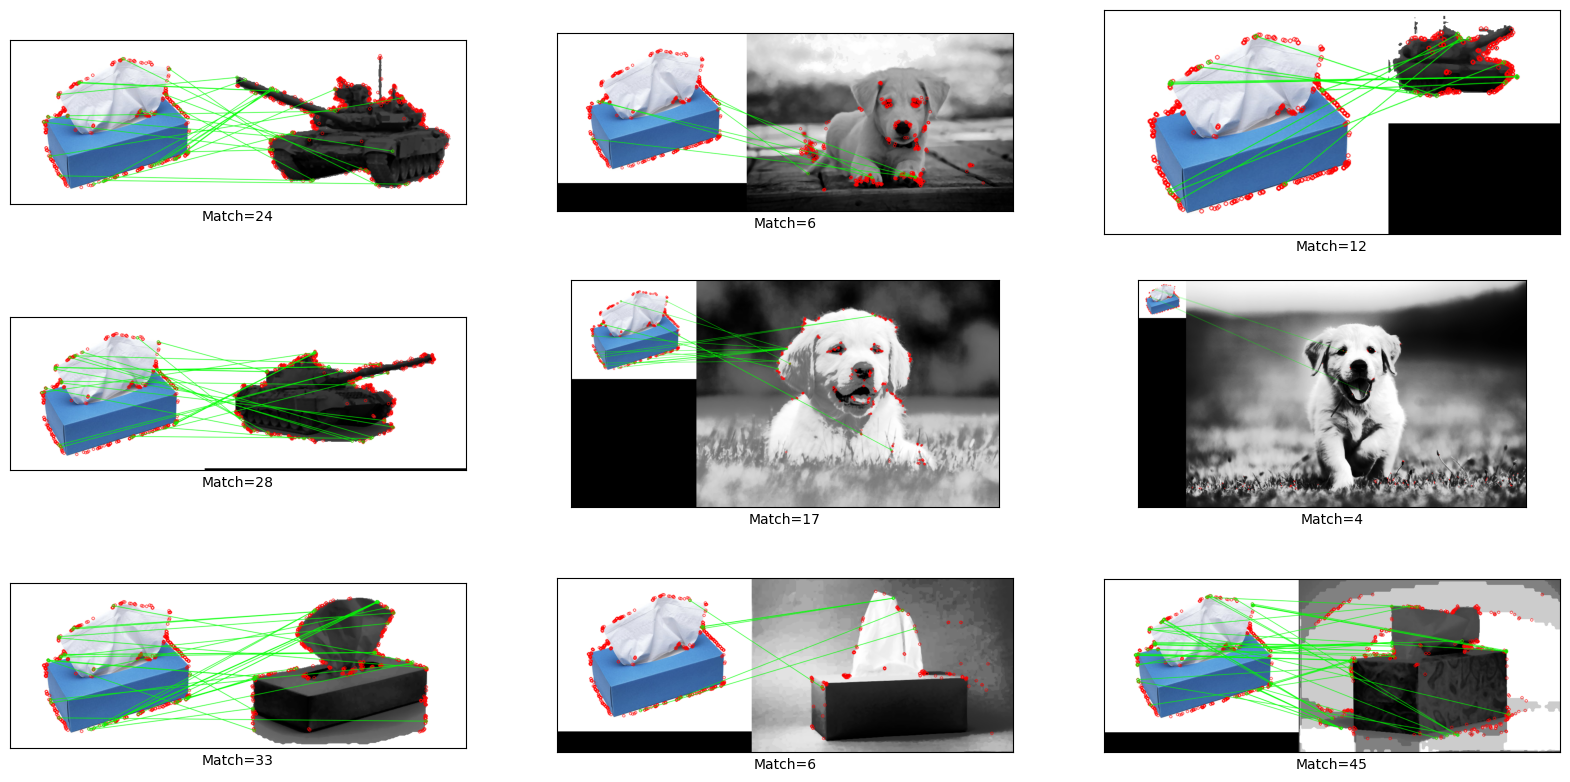

In [11]:
threshold=12
similar_images=[]
best_match=0
best_matches={}
plt.figure(figsize=(20, 10))
for h, i in enumerate(dataset):    
    image_keypoint, image_descriptor=orb.detectAndCompute(i, None)
    image_descriptor=np.float32(image_descriptor)
    
    flenn=cv.FlannBasedMatcher(dict(algorithm=1), dict(checks=1000))
    match=flenn.knnMatch(input_descriptor, image_descriptor, k=2)
    
    matchesmask=[[0, 0] for _ in range(len(match))]
    current_mask=0
    
    for j, (fm, sm) in enumerate(match):
        if fm.distance < .8 * sm.distance:
            matchesmask[j]=[1,0]
            current_mask+=1
    
    if current_mask>=threshold:
        similar_images.append(i)
        
    result=cv.drawMatchesKnn(
        input_image,
        input_keypoint,
        i,
        image_keypoint,
        match,
        None,
        [0,255,0],
        [255,0,0],
        matchesmask
    )
    
    plt.subplot(3, 3, h+1)
    plt.xlabel(f"Match={current_mask}")
    plt.imshow(result)
    plt.xticks([])
    plt.yticks([])
        
    if current_mask > best_match:
        best_match=current_mask
        best_matches={
            "image": i,
            "descriptor": image_descriptor,
            "keypoint": image_keypoint,
            "match":match,
            "matchesmask":matchesmask   
        }
plt.show()

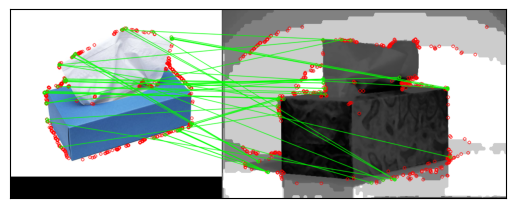

In [12]:
result=cv.drawMatchesKnn(
    input_image,
    input_keypoint,
    best_matches["image"],
    best_matches["keypoint"],
    best_matches["match"],
    None,
    [0,255,0],
    [255,0,0],
    best_matches["matchesmask"]
)
show_image(result)

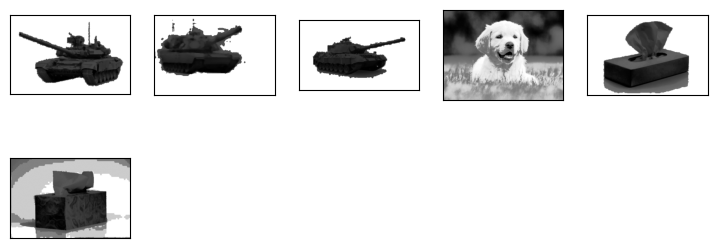

In [13]:
plt.figure(figsize=(9,9))
for h, i in enumerate(similar_images):
    plt.subplot(5,5,h+1)
    plt.imshow(i, cmap="gray")
    plt.xticks([])
    plt.yticks([])
plt.show()